# Data Preparation

Tareas por realizar en la etapa de preparacion:

- Seleccion de datos relevantes
- limpieza de los datos (missing values, outliers)
- Construir nuevas variables (feature engineering)
- Integrar datos de múltiples fuentes
- Formatear y transformar datos

In [12]:
%load_ext kedro.ipython 
catalog.keys()

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython



[
    'companies',
    'reviews',
    'shuttles',
    'preprocess_fifa_21',
    'parameters',
    'DataSetFIFA22',
    'DataSetFIFA21',
    'DataSetFIFA20'
]

In [13]:
FIFA22_df = catalog.load("DataSetFIFA22")
FIFA21_df = catalog.load("DataSetFIFA21")
FIFA20_df = catalog.load("DataSetFIFA20")

[09/15/25 23:56:39] INFO     Loading data from DataSetFIFA22 (CSVDataset)...                   ]8;id=178498;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=546943;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

                    INFO     Loading data from DataSetFIFA21 (CSVDataset)...                   ]8;id=351985;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=762261;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

[09/15/25 23:56:40] INFO     Loading data from DataSetFIFA20 (CSVDataset)...                   ]8;id=872919;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=17497;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
#Verificar si es necesario respaldo o se usa un pipelie
#FIFA22_df_R = FIFA22_df.copy()

### **Columnas eliminadas**

Identificadores / texto libre / URLs:
ID, Name, Photo, Flag, Club Logo. No aportan 

In [80]:
FIFA22_df.drop(columns=['Photo'], inplace=True)
FIFA22_df.drop(columns=['Flag'], inplace=True)
FIFA22_df.drop(columns=['Club Logo'], inplace=True)

Marking es la capacidad de marcar o defender del jugador, por lo que es una caracteristica que solo lo tienen jugadores de cierta posicion defensiva, por lo que al ser una variable que influye, se le ingresara valores cero a los datos nulos 

Columnas redudantes o repetitivas
Release Clause
Best Overall Rating

In [87]:
#FIFA22_df.drop(columns=['Best Overall Rating'], inplace=True)
#FIFA22_df.drop(columns=['Release Clause'], inplace=True)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 FIFA22_df.drop(columns=['Best Overall Rating'], inplace=True)                                │
│   2 #FIFA22_df.drop(columns=['Release Clause'], inplace=True)                                    │
│   3                                                                                              │
│                                                                                                  │
│ C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\pand │
│ as\core\frame.py:5588 in drop                                                                    │
│                                                                                                  │
│    5585 │   │   falcon  speed   320.0   250.0                                                    │
│    5586 │   │   │   │   weight  1.0     0.8                                                      │
│    5587 │   │   """                                                                              │
│ ❱  5588 │   │   return super().drop(                                                             │
│    5589 │   │   │   labels=labels,                                                               │
│    5590 │   │   │   axis=axis,                                                                   │
│    5591 │   │   │   index=index,                                                                 │
│                                                                                                  │
│ C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\pand │
│ as\core\generic.py:4807 in drop                                                                  │
│                                                                                                  │
│    4804 │   │                                                                                    │
│    4805 │   │   for axis, labels in axes.items():                                                │
│    4806 │   │   │   if labels is not None:                                                       │
│ ❱  4807 │   │   │   │   obj = obj._drop_axis(labels, axis, level=level, errors=errors)           │
│    4808 │   │                                                                                    │
│    4809 │   │   if inplace:                                                                      │
│    4810 │   │   │   self._update_inplace(obj)                                                    │
│                                                                                                  │
│ C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\pand │
│ as\core\generic.py:4849 in _drop_axis                                                            │
│                                                                                                  │
│    4846 │   │   │   │   │   raise AssertionError("axis must be a MultiIndex")                    │
│    4847 │   │   │   │   new_axis = axis.drop(labels, level=level, errors=errors)                 │
│    4848 │   │   │   else:                                                                        │
│ ❱  4849 │   │   │   │   new_axis = axis.drop(labels, errors=errors)                              │
│    4850 │   │   │   indexer = axis.get_indexer(new_axis)                                         │
│    4851 │   │                                                                                    │
│    4852 │   │   # Case for non-unique axis                                                       │
│                                                            

#### **Eliminación de datos atipicos** (outliers)

<Axes: xlabel='Age'>

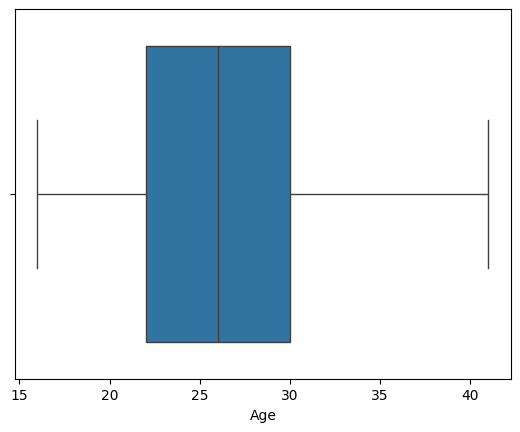

In [41]:
FIFA22_df.drop(FIFA22_df[FIFA22_df['Age'] >=42 ].index, inplace=True)
FIFA22_df.shape
sns.boxplot(x=FIFA22_df['Age'])

np.int64(46)

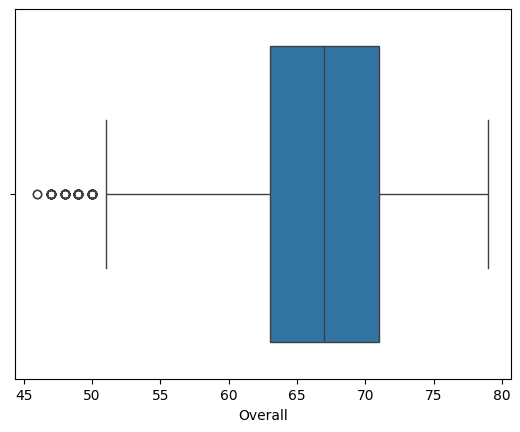

In [85]:
FIFA22_df.drop(FIFA22_df[FIFA22_df['Overall'] <=44 ].index, inplace=True) # ver si se elimina o no
FIFA22_df.shape
sns.boxplot(x=FIFA22_df['Overall'])
FIFA22_df['Overall'].min()

#### Feature engineering

explica el proposito

Promedio de habilidades ofensivas: Con las caracteristicas del jugador ofensivo (ataque) a partir de las caracteristicas de Finishing, Dribbling y ShotPower para  crea una variable llamada Offensive_Skills O Habilidades ofensivas la cual calcula el promedio ofe

Promedio de habilidades defensivas: 

In [89]:
FIFA22_df['Offensive_Skills'] = FIFA22_df[['Finishing', 'Dribbling', 'ShotPower']].mean(axis=1)
FIFA22_df['Defensive_Skills'] = FIFA22_df[['Marking', 'StandingTackle', 'SlidingTackle',
                                           'Interceptions', 'Strength', 'Aggression']].mean(axis=1)


#### **Integrar datos de múltiples fuentes**